## Querying Data

Midas supports dataframes with syntax using that of the [data science module](http://data8.org/datascience/) from Data 8. The following list a quick guide, and in the cells below we have more concrete examples:

* SELECT: `df.select(['col_name', 'more_col_name'])`---note that columns are referenced as strings. Note that you can also access the columns as numpy arrays by using `df['col_name']`, which can be handy to use methods like `np.average(df['col_name'])`.
* WHERE: `df.where('col_name', predicate)` -- the predicates are using lambda functions provided in the [`are`](http://data8.org/datascience/predicates.html) library.
* GROUP: `df.group('col_name', agg_fun)`, the default aggregation for a `group` is count, but you can also supply the aggregation by using existing aggregation functions such as Python's built in `sum`, `min`, `max` (or any of the `numpy` aggregation methods that work on arrays). The groupby operation is applied to all the columns that are not being grouped by on.
* Apply general methods: `df.apply(map_fun, new_column_name)`---note that this is _not_ row level, you have to specify the columns you need.

The following are useful for data modification:
* `df['label']= values` defines the value of a (new) column, note that values must be a numpy array.
* `drop` is useful for dropping a column, for instance, one that you just created.
* `sort` is useful for sorting

Below is a list if you want to look up more functions, http://data8.org/sp20/python-reference.html, but for the sake of the user study, we recommend that you stick to the common functionalities.

In [1]:
# we have imported the relevant functions here
from datascience import Table, are
from datascience.util import make_array

In [2]:
# a toy dataframe for you to understand
t = Table().with_columns(
   'letter', make_array('a', 'b', 'c', 'a', 'b'),
   'count',  make_array(9, 3, 3, 1, 2),
   'points', make_array(1, 2, 2, 10, 1)
)

## Select

In [3]:
t.select(['letter'])

letter
a
b
c
a
b

In [4]:
# you can also use the column series with numpy functions directly
import numpy as np
np.unique(t['letter'])

array(['a', 'b', 'c'], dtype='<U1')

In [5]:
# you can also access rows
t.row(0)

Row(letter='a', count=9, points=1)

In [6]:
t.row(0).letter

'a'

## Where

In [7]:
t.where('letter', 'a')

letter | count | points
a      | 9     | 1
a      | 1     | 10

In [8]:
# note different from pandas, like `df[df['a']>8]`
t.where('count', are.above(4))

letter | count | points
a      | 9     | 1

In [9]:
# compare two columns
t.where("count", are.above, "points")

letter | count | points
a      | 9     | 1
b      | 3     | 2
c      | 3     | 2
b      | 2     | 1

## Group

In [10]:
# the default performs a count
t.group('letter')

letter | count
a      | 2
b      | 2
c      | 1

In [11]:
t.group('letter', sum)

letter | count sum | points sum
a      | 10        | 11
b      | 5         | 3
c      | 3         | 2

In [12]:
t.select(['letter', 'points']).group('letter', sum)

letter | points sum
a      | 11
b      | 3
c      | 2

## Apply

In [13]:
# apply function to all rows in a column
t.apply(lambda x: x - 1, 'points')

array([0, 1, 1, 9, 0])

In [14]:
# apply function for two columns
t.apply(lambda x, y: x * y, 'count', 'points')

array([ 9,  6,  6, 10,  2])

## Append Column or Rows

In [15]:
t.append(('a', 10, 3))

letter | count | points
a      | 9     | 1
b      | 3     | 2
c      | 3     | 2
a      | 1     | 10
b      | 2     | 1
a      | 10    | 3

In [16]:
t['less_points'] = t.apply(lambda x: x - 1, 'points')
t

letter | count | points | less_points
a      | 9     | 1      | 0
b      | 3     | 2      | 1
c      | 3     | 2      | 1
a      | 1     | 10     | 9
b      | 2     | 1      | 0
a      | 10    | 3      | 2

In [17]:
# then you can remove it
t = t.drop('less_points')
t

letter | count | points
a      | 9     | 1
b      | 3     | 2
c      | 3     | 2
a      | 1     | 10
b      | 2     | 1
a      | 10    | 3

## Sorting

In [18]:
t.sort('points')

letter | count | points
a      | 9     | 1
b      | 2     | 1
b      | 3     | 2
c      | 3     | 2
a      | 10    | 3
a      | 1     | 10

In [19]:
t.sort('points', descending = True)

letter | count | points
a      | 1     | 10
a      | 10    | 3
c      | 3     | 2
b      | 3     | 2
b      | 2     | 1
a      | 9     | 1

## Basic Visualizations

In [20]:
fires_df = Table.read_table("./data/fires.csv")
fires_df

STATE | COUNTY               | LATITUDE | LONGITUDE | FIRE_SIZE | CAUSE_CODE | CAUSE_DESCR    | DISCOVERY_DATE | DISCOVERY_TIME | CONT_DATE   | CONT_TIME
GA    | Bulloch              | 32.3551  | -81.8311  | 7.5       | 5          | Debris Burning | 2.45232e+06    | 13             | 2.45232e+06 | 13
UT    | San Juan             | 37.6603  | -109.551  | 10        | 1          | Lightning      | 2.45137e+06    | 18             | 2.45137e+06 | 13
UT    | Cache                | 41.8406  | -111.714  | 0.1       | 1          | Lightning      | 2.45689e+06    | 19             | 2.4569e+06  | 17
OR    | Douglas              | 43.5933  | -123.271  | 0.01      | 5          | Debris Burning | 2.45684e+06    | 13             | 2.45684e+06 | 13
AR    | SEVIER               | 33.8706  | -94.1844  | 1         | 7          | Arson          | 2.45668e+06    | 13             | 2.45668e+06 | 16
MS    | Rankin               | 32.1178  | -89.75    | 1         | 3          | Smoking        | 2.44977e+06    | 17             | 2.44977e+06 | 18
AZ    | Pima                 | 32.3733  | -112.696  | 1         | 9          | Miscellaneous  | 2.45681e+06    | 6              | 2.45681e+06 | 14
GA    | Cherokee             | 34.2243  | -84.5505  | 6.02      | 7          | Arson          | 2.44906e+06    | 16             | 2.44906e+06 | 18
TN    | LAWRENCE             | 35.2964  | -87.4779  | 0.2       | 5          | Debris Burning | 2.45515e+06    | 12             | 2.45515e+06 | 13
ID    | Bingham              | 43.0544  | -112.372  | 20.6      | 10         | Fireworks      | 2.45427e+06    | 9              | 2.45427e+06 | 17
... (4990 rows omitted)

In [21]:
test_df = Table().with_columns(
         'days',  make_array(0, 1, 2, 3, 4, 5),
         'price', make_array(90.5, 90.00, 83.00, 95.50, 82.00, 82.00),
         'projection', make_array(90.75, 82.00, 82.50, 82.50, 83.00, 82.50))

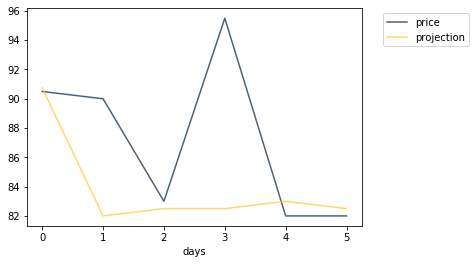

In [22]:
%matplotlib inline
# line charts 
test_df.plot('days') 

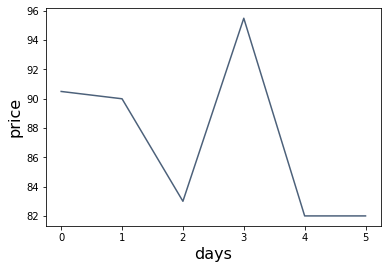

In [23]:
# line charts 
test_df.plot('days', 'price') 

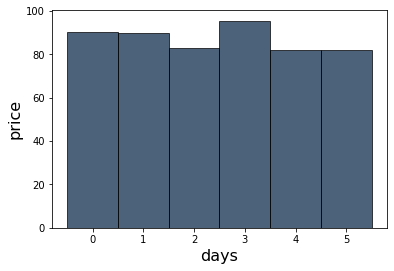

In [24]:
test_df.bar('days', 'price')

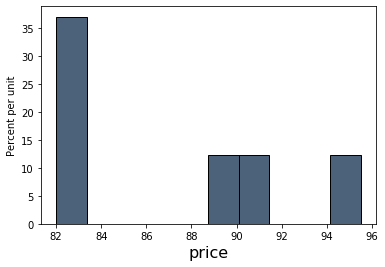

In [25]:
test_df.hist('price')

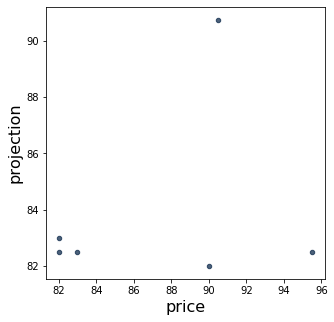

In [26]:
test_df.scatter('price', 'projection')

## You can also use Pandas' plotting utilities

You are also welcome to use other plotting libraries that you are familiar with already.

Note that <font color="red"> for the sake of our experiment, please use datascience module for your querying needs</font>, and limit pandas to plotting purposes only.

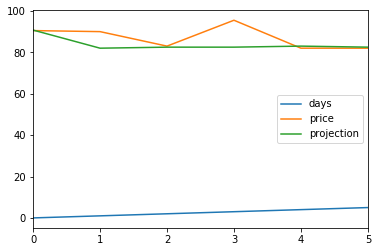

In [27]:
test_df_pd = test_df.to_df()
test_df_pd.plot()